Số ảnh COCO train2017: 118287
Số ảnh Flickr30k: 31783


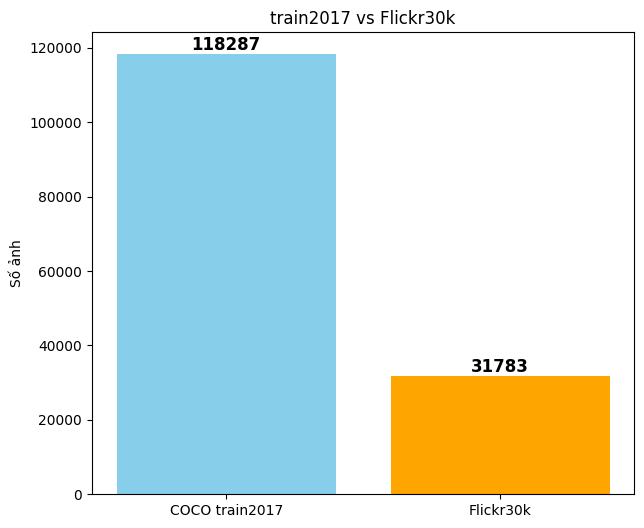

In [6]:
import os
import matplotlib.pyplot as plt

# Path dataset
coco_train_dir = r"D:\dbm302m_project\coco2017\train2017"
flickr_dir = r"D:\dbm302m_project\flickr30k_images\flickr30k_images\flickr30k_images"

# Đếm số ảnh
num_coco = len([f for f in os.listdir(coco_train_dir) if f.endswith(".jpg")])
num_flickr = len([f for f in os.listdir(flickr_dir) if f.endswith(".jpg")])

print(f"Số ảnh COCO train2017: {num_coco}")
print(f"Số ảnh Flickr30k: {num_flickr}")

# Vẽ biểu đồ cột
datasets = ["COCO train2017", "Flickr30k"]
counts = [num_coco, num_flickr]

plt.figure(figsize=(7,6))
bars = plt.bar(datasets, counts, color=["skyblue", "orange"])

# Ghi số lượng ảnh trên cột
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(count),
             ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.title("train2017 vs Flickr30k")
plt.ylabel("Số ảnh")
plt.show()


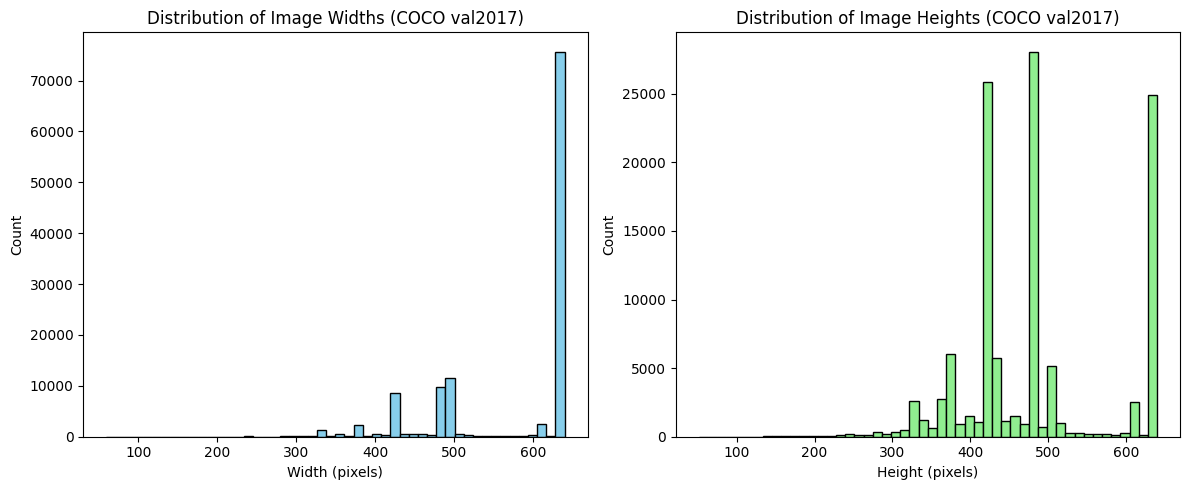

In [6]:
import json
import matplotlib.pyplot as plt
import os

# Đường dẫn annotation file
ann_file = "D:/dbm302m_project/coco2017/annotations/captions_train2017.json"

# Load annotation
with open(ann_file, "r") as f:
    coco_caps = json.load(f)

images = coco_caps["images"]

# Lấy width và height
widths = [img["width"] for img in images]
heights = [img["height"] for img in images]

# Vẽ histogram
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(widths, bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Image Widths (COCO val2017)")
plt.xlabel("Width (pixels)")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.hist(heights, bins=50, color="lightgreen", edgecolor="black")
plt.title("Distribution of Image Heights (COCO val2017)")
plt.xlabel("Height (pixels)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


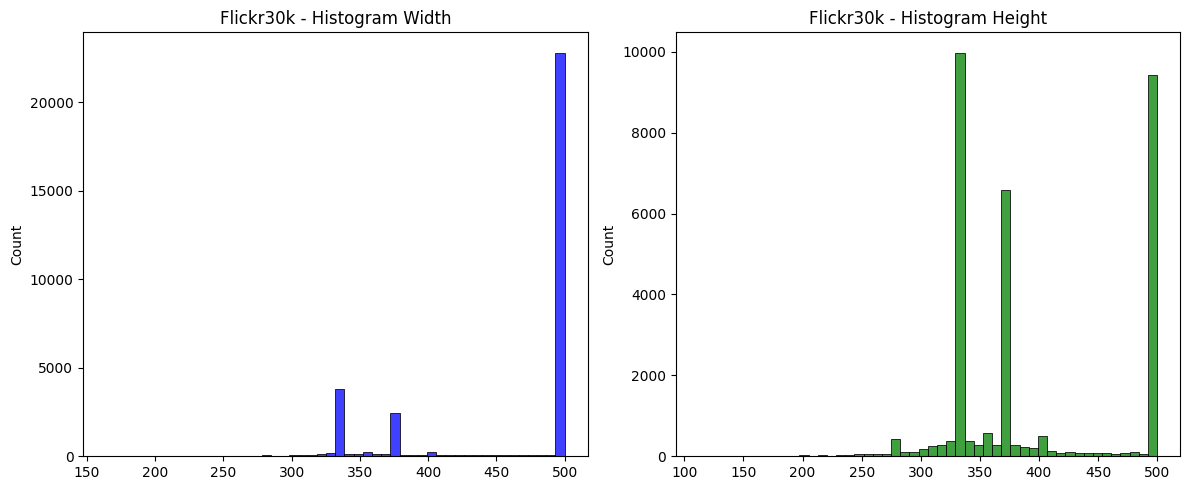

In [7]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# Path đến Flickr30k
flickr_dir = r"D:\dbm302m_project\flickr30k_images\flickr30k_images\flickr30k_images"

# Lấy danh sách ảnh
flickr_images = [os.path.join(flickr_dir, f) for f in os.listdir(flickr_dir) if f.endswith(".jpg")]

widths, heights = [], []

for img_path in flickr_images:
    try:
        with Image.open(img_path) as img:
            w, h = img.size
            widths.append(w)
            heights.append(h)
    except Exception as e:
        print(f"Lỗi ảnh {img_path}: {e}")

# Vẽ histogram
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(widths, bins=50, kde=False, color="blue")
plt.title("Flickr30k - Histogram Width")

plt.subplot(1,2,2)
sns.histplot(heights, bins=50, kde=False, color="green")
plt.title("Flickr30k - Histogram Height")

plt.tight_layout()
plt.show()


100%|██████████| 10000/10000 [03:37<00:00, 45.88it/s]


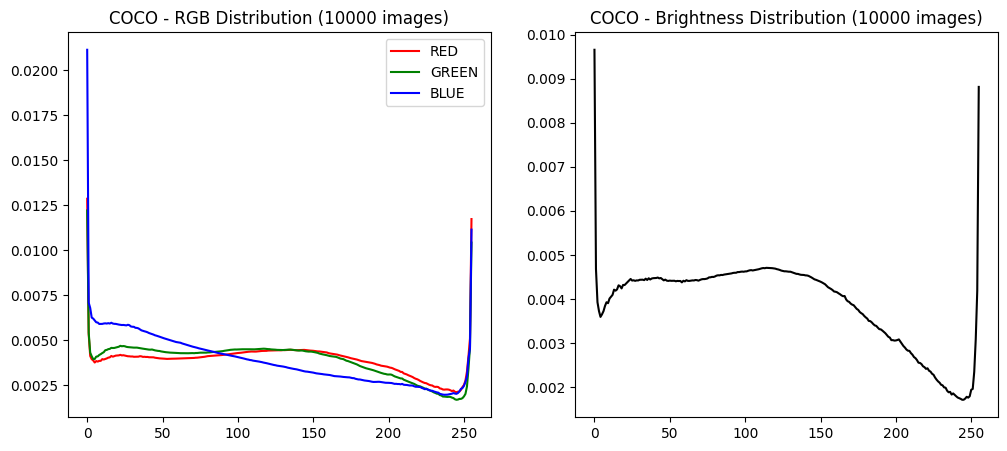

In [13]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

# Lấy danh sách ảnh COCO (vd: train2017)
coco_dir = "./coco2017/train2017"
coco_images = [os.path.join(coco_dir, f) for f in os.listdir(coco_dir)]

# Khởi tạo histogram
rgb_hist = np.zeros((3, 256))
brightness_hist = np.zeros(256)

# Duyệt 1000 ảnh đầu tiên
for img_path in tqdm(coco_images[:10000]):
    try:
        img = Image.open(img_path).convert("RGB")
        arr = np.array(img)

        # Tính histogram RGB
        for i in range(3):
            hist, _ = np.histogram(arr[:,:,i], bins=256, range=(0,255))
            rgb_hist[i] += hist

        # Tính histogram độ sáng (brightness)
        gray = 0.299*arr[:,:,0] + 0.587*arr[:,:,1] + 0.114*arr[:,:,2]
        hist, _ = np.histogram(gray, bins=256, range=(0,255))
        brightness_hist += hist
    except:
        continue

# Chuẩn hóa histogram
rgb_hist = rgb_hist / rgb_hist.sum(axis=1, keepdims=True)
brightness_hist = brightness_hist / brightness_hist.sum()

plt.figure(figsize=(12,5))

# RGB histogram
plt.subplot(1,2,1)
colors = ["red","green","blue"]
for i, c in enumerate(colors):
    plt.plot(rgb_hist[i], color=c, label=f"{c.upper()}")
plt.title("COCO - RGB Distribution (10000 images)")
plt.legend()

# Brightness histogram
plt.subplot(1,2,2)
plt.plot(brightness_hist, color="black")
plt.title("COCO - Brightness Distribution (10000 images)")

plt.show()


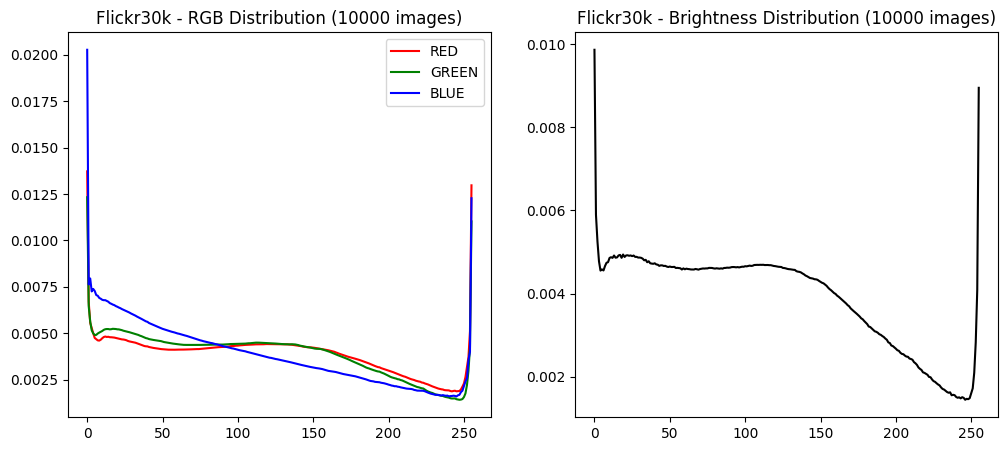

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

# Lấy danh sách ảnh COCO (vd: train2017)
coco_dir = "./flickr30k_images/flickr30k_images/flickr30k_images"
coco_images = [os.path.join(coco_dir, f) for f in os.listdir(coco_dir)]

# Khởi tạo histogram
rgb_hist = np.zeros((3, 256))
brightness_hist = np.zeros(256)

# Duyệt 1000 ảnh đầu tiên
for img_path in tqdm(coco_images[:10000]):
    try:
        img = Image.open(img_path).convert("RGB")
        arr = np.array(img)

        # Tính histogram RGB
        for i in range(3):
            hist, _ = np.histogram(arr[:,:,i], bins=256, range=(0,255))
            rgb_hist[i] += hist

        # Tính histogram độ sáng (brightness)
        gray = 0.299*arr[:,:,0] + 0.587*arr[:,:,1] + 0.114*arr[:,:,2]
        hist, _ = np.histogram(gray, bins=256, range=(0,255))
        brightness_hist += hist
    except:
        continue

# Chuẩn hóa histogram
rgb_hist = rgb_hist / rgb_hist.sum(axis=1, keepdims=True)
brightness_hist = brightness_hist / brightness_hist.sum()

plt.figure(figsize=(12,5))

# RGB histogram
plt.subplot(1,2,1)
colors = ["red","green","blue"]
for i, c in enumerate(colors):
    plt.plot(rgb_hist[i], color=c, label=f"{c.upper()}")
plt.title("Flickr30k - RGB Distribution (10000 images)")
plt.legend()

# Brightness histogram
plt.subplot(1,2,2)
plt.plot(brightness_hist, color="black")
plt.title("Flickr30k - Brightness Distribution (10000 images)")

plt.show()


c:\Users\Phuong\miniconda3\envs\inpaint\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Phuong\miniconda3\envs\inpaint\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 1000/1000 [00:57<00:00, 17.24it/s]


Tổng số ảnh: 1000, số ảnh outlier: 50


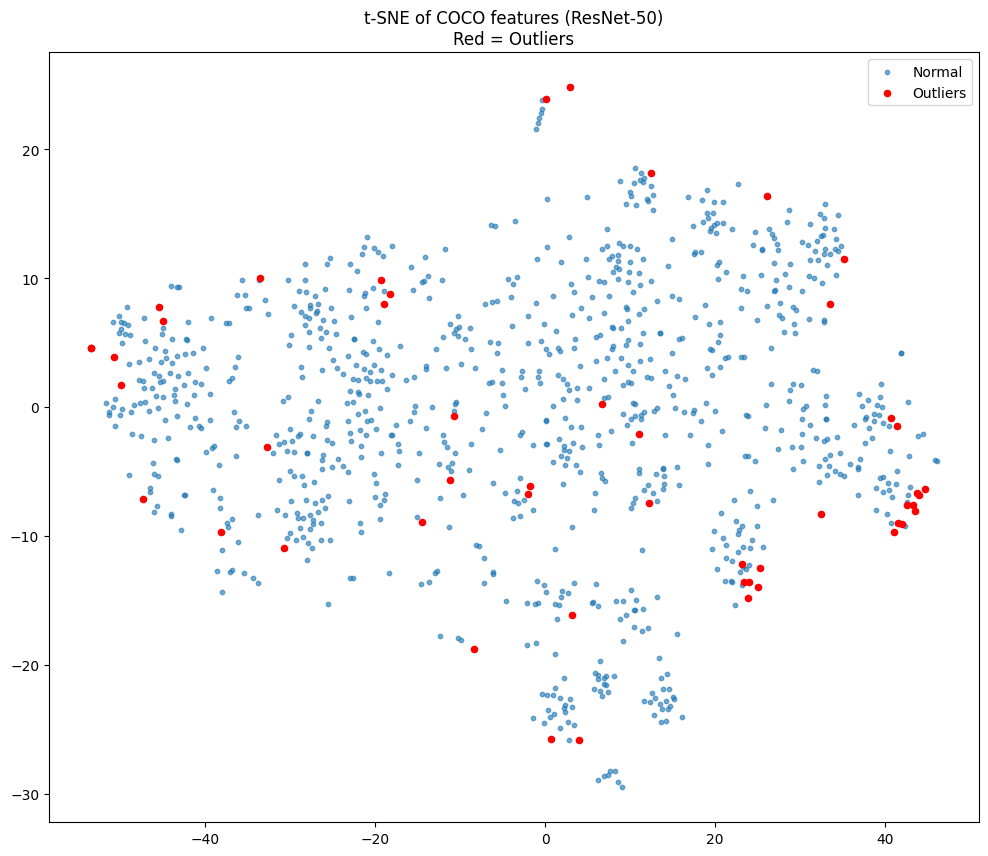

In [4]:
import os
import numpy as np
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
from tqdm import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Load ResNet-50 pretrained (bỏ FC layer)
resnet = models.resnet50(pretrained=True)
resnet.eval()
model = torch.nn.Sequential(*list(resnet.children())[:-1])

# 2. Transform ảnh về input ResNet
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# 3. Load 1000 ảnh COCO
coco_dir = "./coco2017/train2017"
image_paths = [os.path.join(coco_dir, f) for f in os.listdir(coco_dir)][:1000]

features = []
valid_paths = []

for path in tqdm(image_paths):
    try:
        img = Image.open(path).convert("RGB")
        img_tensor = transform(img).unsqueeze(0)
        with torch.no_grad():
            feat = model(img_tensor).squeeze().numpy()
        features.append(feat.flatten())
        valid_paths.append(path)
    except:
        continue

features = np.array(features)

# 4. Phát hiện outliers bằng khoảng cách tới tâm
center = features.mean(axis=0)
distances = np.linalg.norm(features - center, axis=1)
threshold = np.percentile(distances, 95)  # top 5% xa nhất coi là outlier
outlier_idx = np.where(distances > threshold)[0]

print(f"Tổng số ảnh: {len(features)}, số ảnh outlier: {len(outlier_idx)}")

# 5. Giảm chiều bằng t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
features_2d = tsne.fit_transform(features)

# 6. Vẽ scatter plot
plt.figure(figsize=(12, 10))
plt.title("t-SNE of COCO features (ResNet-50)\nRed = Outliers")

plt.scatter(features_2d[:,0], features_2d[:,1], s=10, alpha=0.6, label="Normal")
plt.scatter(features_2d[outlier_idx,0], features_2d[outlier_idx,1], 
            color="red", s=20, label="Outliers")

plt.legend()
plt.show()


c:\Users\Phuong\miniconda3\envs\inpaint\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Phuong\miniconda3\envs\inpaint\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 1000/1000 [01:05<00:00, 15.32it/s]


Tổng số ảnh: 1000, số ảnh outlier: 50


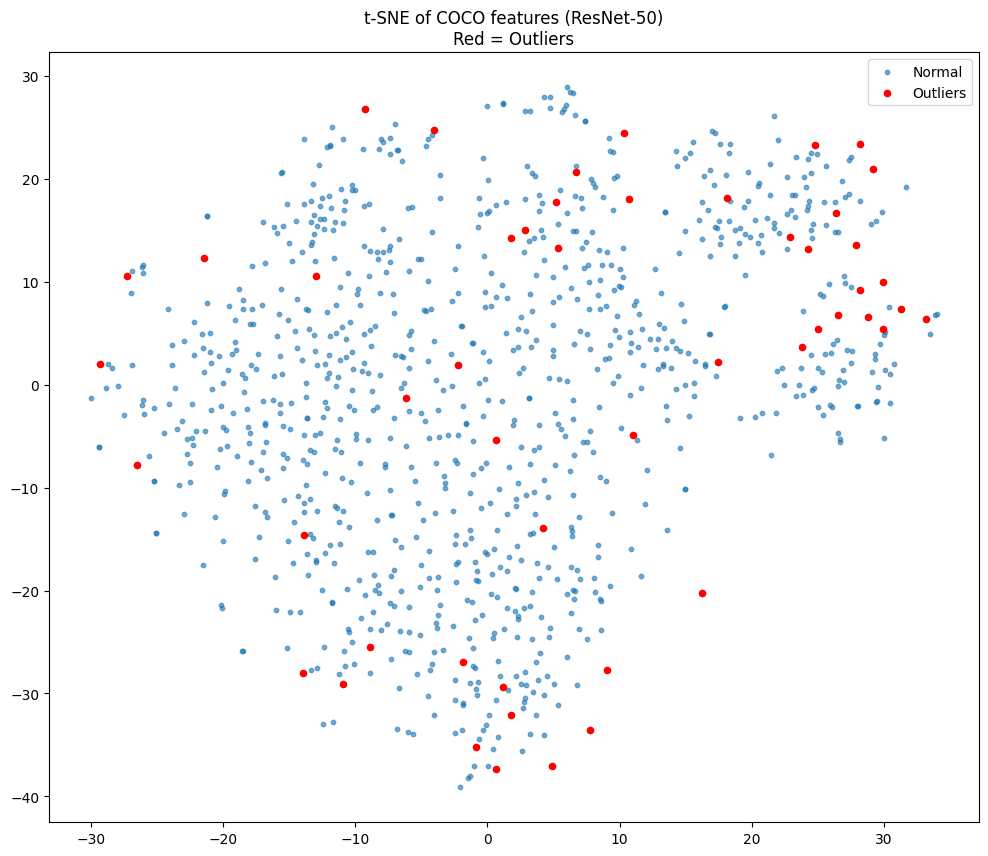

In [5]:
import os
import numpy as np
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
from tqdm import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Load ResNet-50 pretrained (bỏ FC layer)
resnet = models.resnet50(pretrained=True)
resnet.eval()
model = torch.nn.Sequential(*list(resnet.children())[:-1])

# 2. Transform ảnh về input ResNet
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# 3. Load 1000 ảnh COCO
coco_dir = "./flickr30k_images/flickr30k_images/flickr30k_images"
image_paths = [os.path.join(coco_dir, f) for f in os.listdir(coco_dir)][:1000]

features = []
valid_paths = []

for path in tqdm(image_paths):
    try:
        img = Image.open(path).convert("RGB")
        img_tensor = transform(img).unsqueeze(0)
        with torch.no_grad():
            feat = model(img_tensor).squeeze().numpy()
        features.append(feat.flatten())
        valid_paths.append(path)
    except:
        continue

features = np.array(features)

# 4. Phát hiện outliers bằng khoảng cách tới tâm
center = features.mean(axis=0)
distances = np.linalg.norm(features - center, axis=1)
threshold = np.percentile(distances, 95)  # top 5% xa nhất coi là outlier
outlier_idx = np.where(distances > threshold)[0]

print(f"Tổng số ảnh: {len(features)}, số ảnh outlier: {len(outlier_idx)}")

# 5. Giảm chiều bằng t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
features_2d = tsne.fit_transform(features)

# 6. Vẽ scatter plot
plt.figure(figsize=(12, 10))
plt.title("t-SNE of COCO features (ResNet-50)\nRed = Outliers")

plt.scatter(features_2d[:,0], features_2d[:,1], s=10, alpha=0.6, label="Normal")
plt.scatter(features_2d[outlier_idx,0], features_2d[outlier_idx,1], 
            color="red", s=20, label="Outliers")

plt.legend()
plt.show()


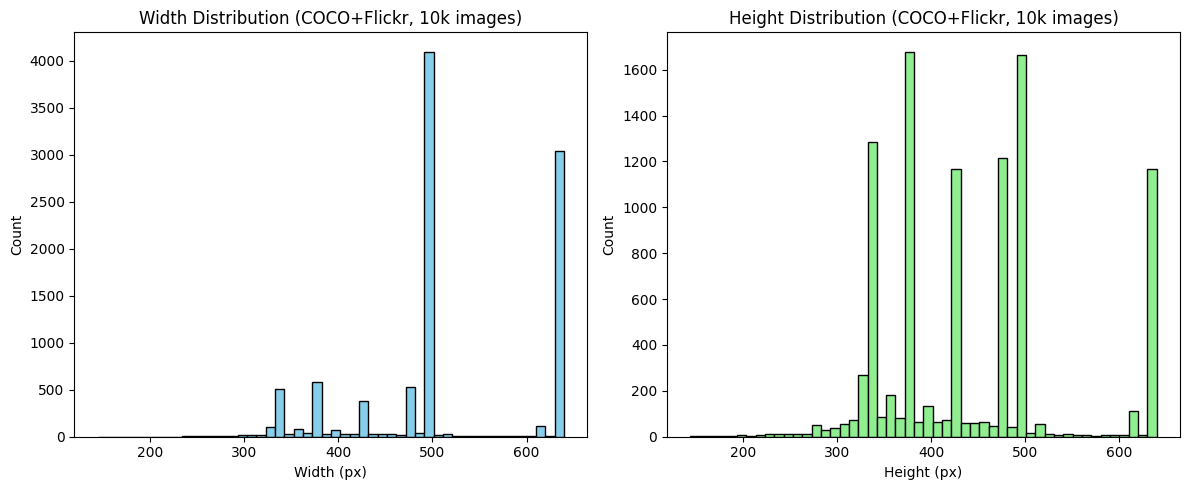

In [9]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt

# ===================== COCO =====================
coco_ann_file = r"D:\dbm302m_project\coco2017\annotations\captions_train2017.json"

with open(coco_ann_file, "r") as f:
    coco_caps = json.load(f)

coco_images = coco_caps["images"][:5000]   # lấy 5000 ảnh đầu
coco_widths = [img["width"] for img in coco_images]
coco_heights = [img["height"] for img in coco_images]

# ===================== Flickr =====================
flickr_dir = r"D:\dbm302m_project\flickr30k_images\flickr30k_images\flickr30k_images"
flickr_files = [os.path.join(flickr_dir, f) for f in os.listdir(flickr_dir) if f.endswith(".jpg")][:5000]

flickr_widths, flickr_heights = [], []
for img_path in flickr_files:
    try:
        with Image.open(img_path) as img:
            w, h = img.size
            flickr_widths.append(w)
            flickr_heights.append(h)
    except Exception as e:
        print(f"Lỗi ảnh {img_path}: {e}")

# ===================== GỘP COCO + Flickr =====================
all_widths = coco_widths + flickr_widths
all_heights = coco_heights + flickr_heights

# ===================== Vẽ histogram =====================
plt.figure(figsize=(12,5))

# Width
plt.subplot(1,2,1)
plt.hist(all_widths, bins=50, color="skyblue", edgecolor="black")
plt.title("Width Distribution (COCO+Flickr, 10k images)")
plt.xlabel("Width (px)")
plt.ylabel("Count")

# Height
plt.subplot(1,2,2)
plt.hist(all_heights, bins=50, color="lightgreen", edgecolor="black")
plt.title("Height Distribution (COCO+Flickr, 10k images)")
plt.xlabel("Height (px)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


Processing images: 100%|██████████| 10000/10000 [02:03<00:00, 80.82it/s]


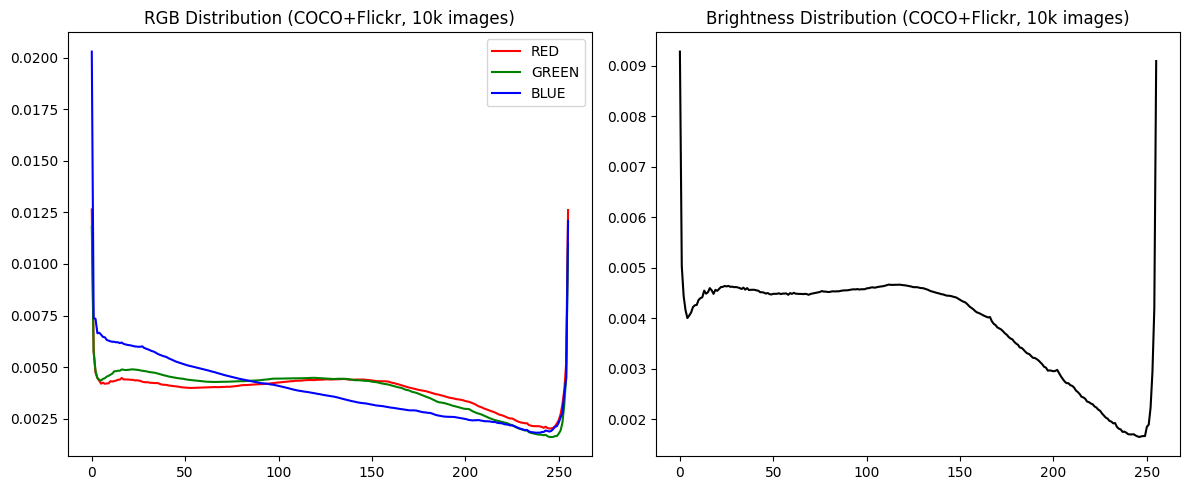

In [10]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

# ===================== Dataset Paths =====================
coco_dir = "./coco2017/train2017"
flickr_dir = "./flickr30k_images/flickr30k_images/flickr30k_images"

coco_images = [os.path.join(coco_dir, f) for f in os.listdir(coco_dir)][:5000]
flickr_images = [os.path.join(flickr_dir, f) for f in os.listdir(flickr_dir) if f.endswith(".jpg")][:5000]

all_images = coco_images + flickr_images   # gộp lại 10k ảnh

# ===================== Histogram =====================
rgb_hist = np.zeros((3, 256))
brightness_hist = np.zeros(256)

for img_path in tqdm(all_images, desc="Processing images"):
    try:
        img = Image.open(img_path).convert("RGB")
        arr = np.array(img)

        # Tính histogram RGB
        for i in range(3):
            hist, _ = np.histogram(arr[:,:,i], bins=256, range=(0,255))
            rgb_hist[i] += hist

        # Tính histogram độ sáng (brightness)
        gray = 0.299*arr[:,:,0] + 0.587*arr[:,:,1] + 0.114*arr[:,:,2]
        hist, _ = np.histogram(gray, bins=256, range=(0,255))
        brightness_hist += hist
    except:
        continue

# ===================== Chuẩn hóa =====================
rgb_hist = rgb_hist / rgb_hist.sum(axis=1, keepdims=True)
brightness_hist = brightness_hist / brightness_hist.sum()

# ===================== Plot =====================
plt.figure(figsize=(12,5))

# RGB histogram
plt.subplot(1,2,1)
colors = ["red","green","blue"]
for i, c in enumerate(colors):
    plt.plot(rgb_hist[i], color=c, label=f"{c.upper()}")
plt.title("RGB Distribution (COCO+Flickr, 10k images)")
plt.legend()

# Brightness histogram
plt.subplot(1,2,2)
plt.plot(brightness_hist, color="black")
plt.title("Brightness Distribution (COCO+Flickr, 10k images)")

plt.tight_layout()
plt.show()


c:\Users\Phuong\miniconda3\envs\inpaint\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Phuong\miniconda3\envs\inpaint\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Extracting features: 100%|██████████| 2000/2000 [02:03<00:00, 16.14it/s]


Tổng số ảnh hợp lệ: 2000
Số outliers: 100


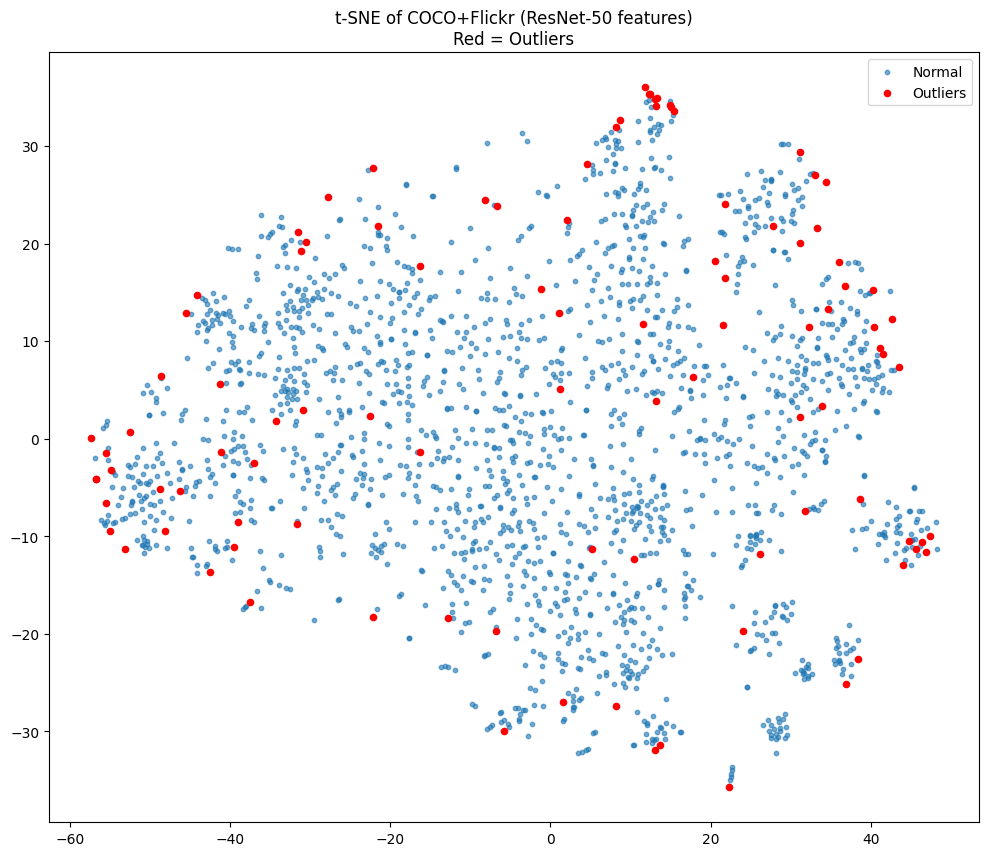

In [11]:
import os
import numpy as np
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
from tqdm import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# ===================== 1. Load ResNet-50 pretrained (bỏ FC layer) =====================
resnet = models.resnet50(pretrained=True)
resnet.eval()
model = torch.nn.Sequential(*list(resnet.children())[:-1])

# ===================== 2. Transform ảnh về input ResNet =====================
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# ===================== 3. Load ảnh COCO + Flickr =====================
coco_dir = "./coco2017/train2017"
flickr_dir = "./flickr30k_images/flickr30k_images/flickr30k_images"

coco_images = [os.path.join(coco_dir, f) for f in os.listdir(coco_dir)][:1000]
flickr_images = [os.path.join(flickr_dir, f) for f in os.listdir(flickr_dir) if f.endswith(".jpg")][:1000]

all_images = coco_images + flickr_images

# ===================== 4. Trích đặc trưng ResNet =====================
features = []
valid_paths = []

for path in tqdm(all_images, desc="Extracting features"):
    try:
        img = Image.open(path).convert("RGB")
        img_tensor = transform(img).unsqueeze(0)
        with torch.no_grad():
            feat = model(img_tensor).squeeze().numpy()
        features.append(feat.flatten())
        valid_paths.append(path)
    except:
        continue

features = np.array(features)
print(f"Tổng số ảnh hợp lệ: {len(features)}")

# ===================== 5. Phát hiện outliers =====================
center = features.mean(axis=0)
distances = np.linalg.norm(features - center, axis=1)
threshold = np.percentile(distances, 95)  # top 5% xa nhất = outlier
outlier_idx = np.where(distances > threshold)[0]

print(f"Số outliers: {len(outlier_idx)}")

# ===================== 6. Giảm chiều bằng t-SNE =====================
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
features_2d = tsne.fit_transform(features)

# ===================== 7. Vẽ scatter plot =====================
plt.figure(figsize=(12, 10))
plt.title("t-SNE of COCO+Flickr (ResNet-50 features)\nRed = Outliers")

plt.scatter(features_2d[:,0], features_2d[:,1], s=10, alpha=0.6, label="Normal")
plt.scatter(features_2d[outlier_idx,0], features_2d[outlier_idx,1], 
            color="red", s=20, label="Outliers")

plt.legend()
plt.show()
